<a href="https://colab.research.google.com/github/rahulkrishna1996/BusinessCaseStudy/blob/main/AerofitCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import math as math

#RAW DATA

#INSIGHTS BEFORE RAW DATA

#1.Defining Problem Statement and Analysing basic metrics

In [ ]:
dataframe=pd.read_csv('aerofit_treadmill.csv')
dataframe.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
dataframe.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#checking null values in every column of our data
dataframe.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


#2.Non-Graphical Analysis: Value counts and unique attributes

2.1 Products value counts and unique

In [ ]:
dataframe["Product"].value_counts().reset_index()


,Product,count
0,KP281,80
1,KP481,60
2,KP781,40


In [ ]:
dataframe["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

2.2 Age Groups value counts and unique

In [ ]:
dataframe['Age'].value_counts().reset_index()

,Age,count
0,25,25
1,23,18
2,24,12
3,26,12
4,28,9
5,35,8
6,33,8
7,30,7
8,38,7
9,21,7


In [ ]:
dataframe['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

2.3  Gender value counts and unique

In [ ]:
dataframe['Gender'].value_counts().reset_index()

,Gender,count
0,Male,104
1,Female,76


In [ ]:
dataframe['Gender'].unique()

array(['Male', 'Female'], dtype=object)

2.3 Marital Status value counts and unique

In [ ]:
dataframe['MaritalStatus'].value_counts().reset_index()

,MaritalStatus,count
0,Partnered,107
1,Single,73


In [ ]:
dataframe['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

#3.Visual Analysis - Univariate & Bivariate

3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

<ipython-input-14-196f1a338577>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Age'])


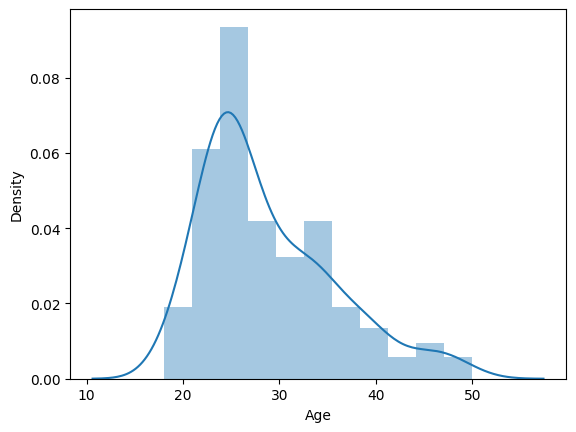

In [ ]:
sns.distplot(dataframe['Age'])
plt.show()

<Axes: xlabel='count', ylabel='Gender'>

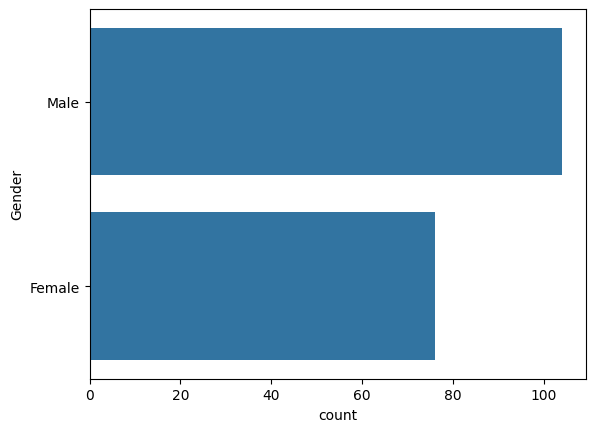

In [ ]:
sns.countplot(dataframe['Gender'])

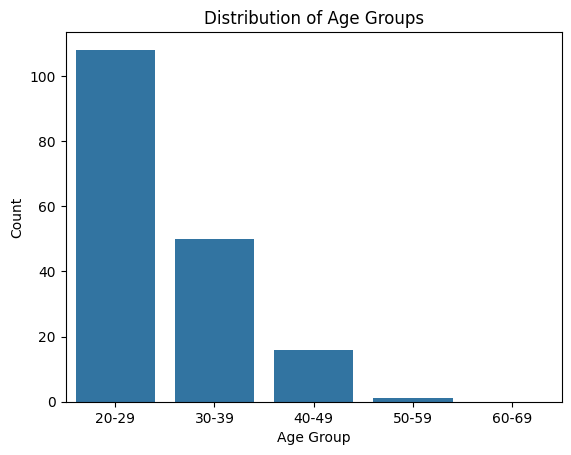

In [ ]:

    # Define age group bins
    bins = [20, 30, 40, 50, 60, 70]
    labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
    dataframe['AgeGroup'] = pd.cut(dataframe['Age'], bins=bins, labels=labels, right=False)

    # Create countplot for age groups
    sns.countplot(x='AgeGroup', data=dataframe)
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.title('Distribution of Age Groups')
    plt.show()

3.2 For categorical variable(s): Boxplot

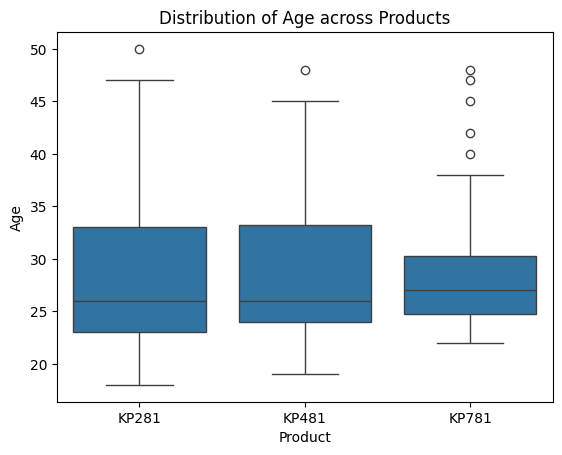

In [ ]:


# Example: Box plot of Age across different Products
sns.boxplot(x='Product', y='Age', data=dataframe)
plt.xlabel('Product')
plt.ylabel('Age')
plt.title('Distribution of Age across Products')
plt.show()



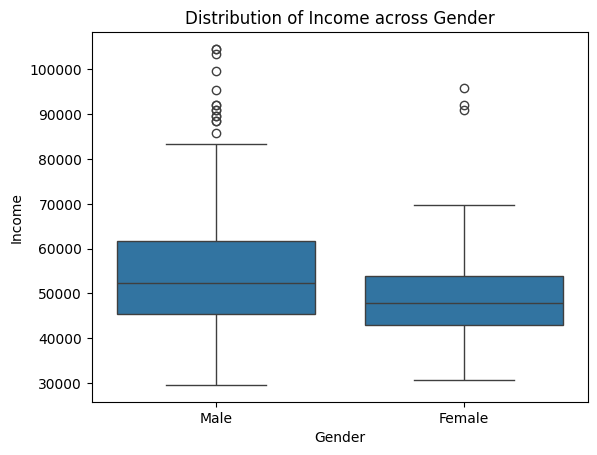

In [ ]:
# Example: Box plot of Income across different Genders
sns.boxplot(x='Gender', y='Income', data=dataframe) #Assuming you have 'Income' in your dataframe.
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Distribution of Income across Gender')
plt.show()

3.3 For correlation: Heatmaps, Pairplots

In [ ]:
correlation_matrix = dataframe.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.pairplot(dataframe)
plt.title('Pairplot of Variables')
plt.show()

#4.Missing Value & Outlier Detection

In [ ]:
NONE

# What is the probability of a male customer buying a KP781 treadmill?

In [ ]:
male_kp781_buyers = dataframe[(dataframe['Gender'] == 'Male') & (dataframe['Product'] == 'KP781')]

In [ ]:
total_male_customers = len(dataframe[dataframe['Gender'] == 'Male'])
probability = len(male_kp781_buyers) / total_male_customers
print(f"Probability of a male customer buying KP781: {probability:.4f}")

Probability of a male customer buying KP781: 0.3173
